Response Variable (AKA Dependent Variable)
The variable you want to predict

Explanatory Variable (AKA Independent Variable)
The variables that explain how the response variable will change



In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import skew, kurtosis

import seaborn as sns

import statistics as stat

from statsmodels.formula.api import ols

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\Desktop\D208 Assessment Files\medical_clean.csv')

##Univariate Stats Dataframe
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', 'Median', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].median(), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'County', 'Zip', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
print(unistats(df))

                    Count  Missing  Unique    Dtype  Numeric          Mean  \
vitD_supp           10000        0       6    int64     True        0.3989   
Children            10000        0      11    int64     True        2.0972   
Income              10000        0    9993  float64     True   40490.49516   
Full_meals_eaten    10000        0       8    int64     True        1.0014   
Additional_charges  10000        0    9418  float64     True  12934.528587   
Initial_days        10000        0    9997  float64     True     34.455299   
TotalCharge         10000        0    9997  float64     True   5312.172769   
VitD_levels         10000        0    9976  float64     True     17.964262   
Age                 10000        0      72    int64     True       53.5117   
Doc_visits          10000        0       9    int64     True        5.0122   
Marital             10000        0       5   object    False             -   
Services            10000        0       4   object    False    

In [2]:
df = pd.get_dummies(df, columns=["Marital", "Services", "Gender", "Initial_admin", "Complication_risk"])

In [3]:
#Data Wrangling; turn categorical values into quantitative data
df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   ReAdmis                              10000 non-null  object 
 4   VitD_levels                          10000 non-null  float64
 5   Doc_visits                           10000 non-null  int64  
 6   Full_meals_eaten                     10000 non-null  int64  
 7   vitD_supp                            10000 non-null  int64  
 8   Soft_drink                           10000 non-null  object 
 9   HighBlood                            10000 non-null  object 
 10  Stroke                               10000 non-null  object 
 11  Overweight                   

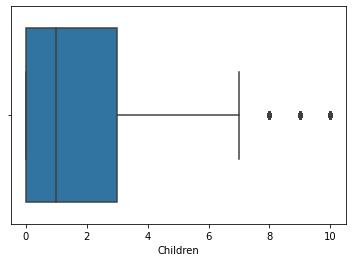

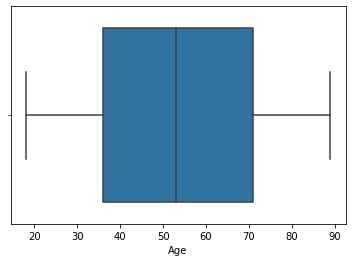

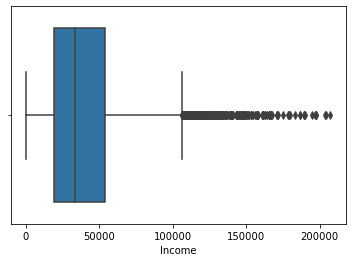

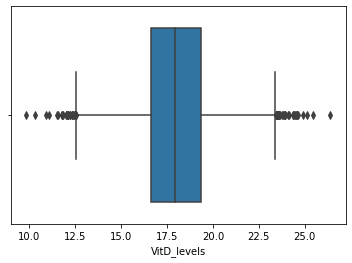

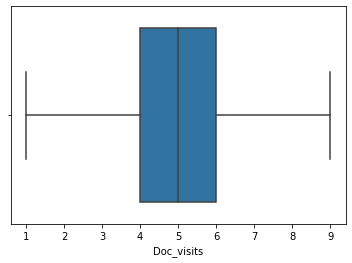

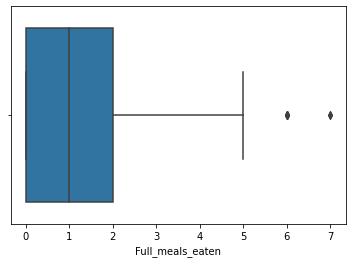

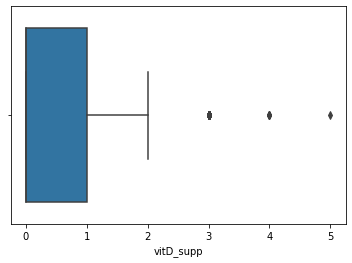

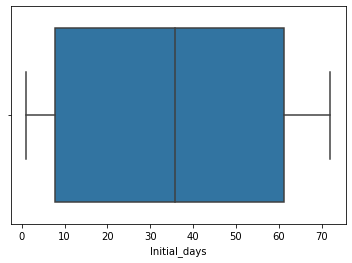

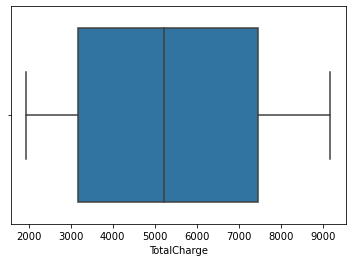

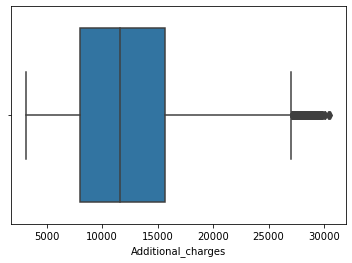

In [6]:
#Detection of outliers
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Age',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='VitD_levels',data=df)
plt.show()
boxplot=sns.boxplot(x='Doc_visits',data=df)
plt.show()
boxplot=sns.boxplot(x='Full_meals_eaten',data=df)
plt.show()
boxplot=sns.boxplot(x='vitD_supp',data=df)
plt.show()
boxplot=sns.boxplot(x='Initial_days',data=df)
plt.show()
boxplot=sns.boxplot(x='TotalCharge',data=df)
plt.show()
boxplot=sns.boxplot(x='Additional_charges',data=df)
plt.show()

In [7]:
##Univariate Stats Dataframe
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', 'Median', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].median(), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

print(unistats(df))

                                     Count  Missing  Unique    Dtype  Numeric  \
Gender_Nonbinary                     10000        0       2    uint8     True   
Services_MRI                         10000        0       2    uint8     True   
Services_CT Scan                     10000        0       2    uint8     True   
vitD_supp                            10000        0       6    int64     True   
Marital_Divorced                     10000        0       2    uint8     True   
Marital_Never Married                10000        0       2    uint8     True   
Marital_Separated                    10000        0       2    uint8     True   
Stroke_numeric                       10000        0       2    int64     True   
Marital_Married                      10000        0       2    uint8     True   
Marital_Widowed                      10000        0       2    uint8     True   
Children                             10000        0      11    int64     True   
Income                      

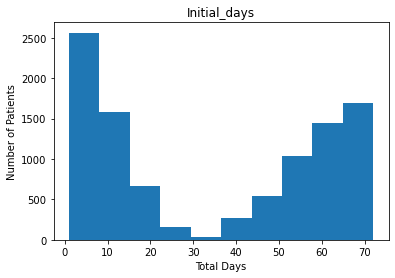

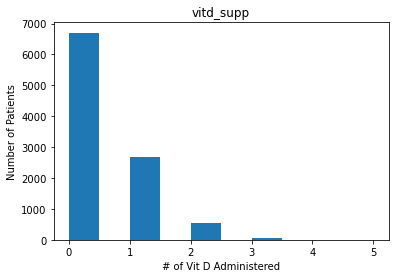

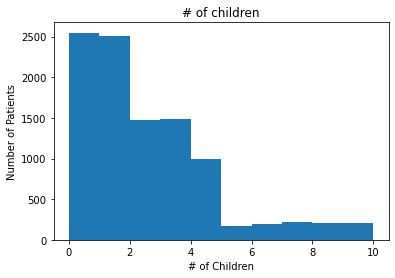

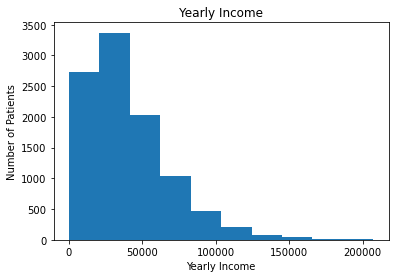

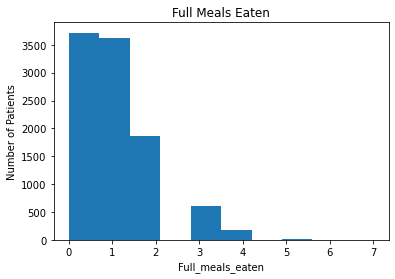

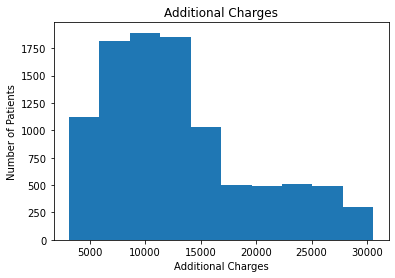

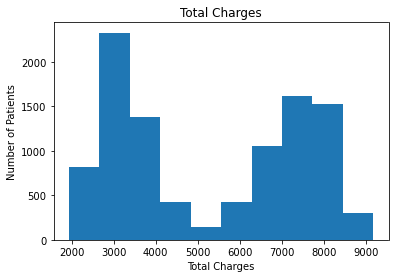

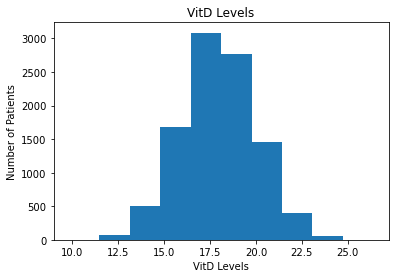

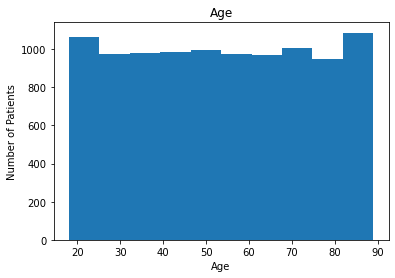

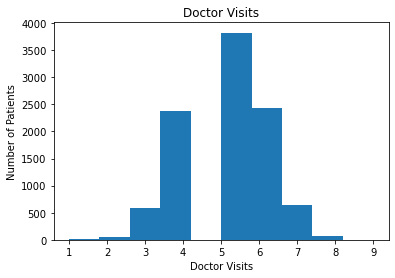

In [8]:
#Univariate Visualization
plt.hist(df.Initial_days)
plt.xlabel('Total Days')
plt.ylabel('Number of Patients')
plt.title('Initial_days')
plt.show()

plt.hist(df.vitD_supp)
plt.xlabel('# of Vit D Administered')
plt.ylabel('Number of Patients')
plt.title('vitd_supp')
plt.show()

plt.hist(df.Children)
plt.xlabel('# of Children')
plt.ylabel('Number of Patients')
plt.title('# of children')
plt.show()

plt.hist(df.Income)
plt.xlabel('Yearly Income')
plt.ylabel('Number of Patients')
plt.title('Yearly Income')
plt.show()

plt.hist(df.Full_meals_eaten)
plt.xlabel('Full_meals_eaten')
plt.ylabel('Number of Patients')
plt.title('Full Meals Eaten')
plt.show()

plt.hist(df.Additional_charges)
plt.xlabel('Additional Charges')
plt.ylabel('Number of Patients')
plt.title('Additional Charges')
plt.show()

plt.hist(df.TotalCharge)
plt.xlabel('Total Charges')
plt.ylabel('Number of Patients')
plt.title('Total Charges')
plt.show()

plt.hist(df.VitD_levels)
plt.xlabel('VitD Levels')
plt.ylabel('Number of Patients')
plt.title('VitD Levels')
plt.show()

plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age')
plt.show()

plt.hist(df.Doc_visits)
plt.xlabel('Doctor Visits')
plt.ylabel('Number of Patients')
plt.title('Doctor Visits')
plt.show()


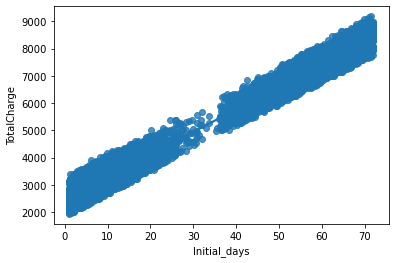

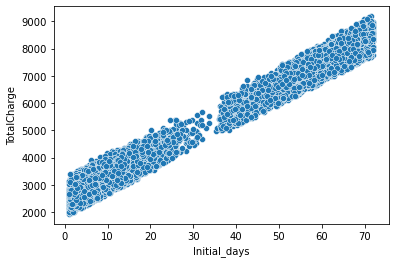

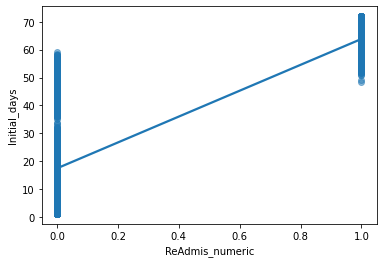

In [9]:
#Bivariate Visualization

sns.regplot(x="Initial_days",
               y="TotalCharge",
               data=df,
               ci=None)

plt.show()

sns.scatterplot(x="Initial_days",
               y="TotalCharge",
               data=df)

plt.show()

sns.regplot(x="ReAdmis_numeric",
               y="Initial_days",
               data=df,
               ci=None,
               scatter_kws={'alpha': 0.5})

plt.show()

In [10]:
##Model with intercept
mdl_readmis_initial = ols("TotalCharge ~ Initial_days",
                             data=df).fit()

print("With Intercept:", mdl_readmis_initial.params)

##Model without intercept

mdl_readmis_initial = ols("TotalCharge ~ Initial_days + 0",
                             data=df).fit()

print("Without intercept:", mdl_readmis_initial.params)

With Intercept: Intercept       2491.973570
Initial_days      81.850956
dtype: float64
Without intercept: Initial_days    127.539572
dtype: float64


In [11]:
sns.displot(data=df,
           x="Initial_days",
            col="Initial_admin",
           col_wrap=2,
           bins=20)

plt.show()

ValueError: Could not interpret value `Initial_admin` for parameter `col`

In [8]:
#Univariate Stats by group
summary_stay = df.groupby("Initial_admin")["Initial_days"].mean()
print(summary_stay)

#More Univariate Stats by group
summary_age = df.groupby("Age")["Initial_days"].mean()
print(summary_age)

Initial_admin
Elective Admission       34.912302
Emergency Admission      34.160300
Observation Admission    34.598303
Name: Initial_days, dtype: float64
Age
18    34.650309
19    33.287151
20    29.082485
21    33.557021
22    33.493792
        ...    
85    37.984800
86    36.573228
87    34.031725
88    36.382057
89    31.668322
Name: Initial_days, Length: 72, dtype: float64


In [9]:
#Data on explanatory values to predict
explanatory_data = pd.DataFrame({"Initial_days": np.arange(0,90)})
print(mdl_readmis_initial.predict(explanatory_data))

0         0.000000
1       127.539572
2       255.079144
3       382.618715
4       510.158287
          ...     
85    10840.863601
86    10968.403173
87    11095.942745
88    11223.482317
89    11351.021888
Length: 90, dtype: float64


In [10]:
#Predicting inside a DataFrame
explanatory_data = pd.DataFrame(
    {"Initial_days": np.arange(0,91)}
)

prediction_data = explanatory_data.assign(
    TotalCharge=mdl_readmis_initial.predict(explanatory_data)
)

print(prediction_data)

    Initial_days   TotalCharge
0              0      0.000000
1              1    127.539572
2              2    255.079144
3              3    382.618715
4              4    510.158287
..           ...           ...
86            86  10968.403173
87            87  11095.942745
88            88  11223.482317
89            89  11351.021888
90            90  11478.561460

[91 rows x 2 columns]


In [11]:
#More Predictions

# Import numpy and alias it np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

NameError: name 'mdl_price_vs_conv' is not defined

In [12]:
#More predictions with a second column of predictions

# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))

# Print the result
print(prediction_data)

NameError: name 'mdl_price_vs_conv' is not defined

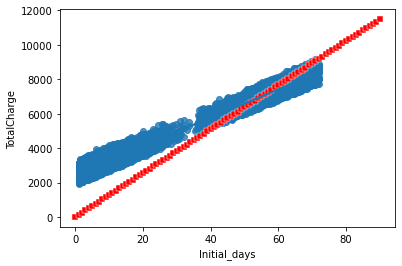

In [13]:
#Showing Predictions
fig = plt.figure()
sns.regplot(x="Initial_days",
            y="TotalCharge",
            ci=None,
            data=df,)
sns.scatterplot(x="Initial_days",
                y="TotalCharge",
               data=prediction_data,
               color="red",
               marker="s")

plt.show()

In [14]:
#Extrapolating: Making predictions outside the range of observed data

little_bream = pd.DataFrame({"length_cm": [10]})

pred_little_bream = little_bream.assign(
    mass_g=mdl_mass_vs_length.predict(little.bream))

print(pred_little_bream)

#Output
    length_cm    mass_g
0          10   -489.847756

#Not sensible to extrapolate this data

IndentationError: unexpected indent (3707494976.py, line 11)

In [15]:
#Fittedvalues: Predictions on the original dataset

print(mdl_readmis_initial.fittedvalues)

##equivalent to

##explanatory_data = pd.DataFrame(
##    {"Initial_days": np.arange(0,91)}
##)

##prediction_data = explanatory_data.assign(
##    TotalCharge=mdl_readmis_initial.predict(explanatory_data)
##)

0       1350.104536
1       1929.617885
2        608.641438
3        218.714956
4        160.037573
           ...     
9995    6576.095919
9996    8757.917924
9997    8947.434076
9998    8080.511895
9999    9036.253909
Length: 10000, dtype: float64


In [16]:
#Residuals: actual response values minus predicted response values

print(mdl_readmis_initial.resid)

0       2376.598324
1       2263.572573
2       1825.592784
3       1909.115467
4       1953.035701
           ...     
9995     274.846081
9996   -1016.227924
9997    -670.953076
9998    -436.028895
9999   -1148.700909
Length: 10000, dtype: float64


In [17]:
#Model summary
mdl_readmis_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            TotalCharge   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          1.272e+05
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:01:46   Log-Likelihood:                         -87652.
No. Observations:               10000   AIC:                                  1.753e+05
Df Residuals:                    9999   BIC:                                  1.753e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Initial_days   127.5396      0.358    356.590      0.000     126.838     128.241
==============================================================================
Omnibus:                    59750.137   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.369
Skew:                          -0.058   Prob(JB):                    9.52e-208
Kurtosis:                       1.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Manually predicting the y axis

# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

#or
coeffs2 = mdl_price_vs_conv.rsquared

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

NameError: name 'mdl_price_vs_conv' is not defined

Regression to the mean

The concept
- Response value = fitted value + residual (ie the amount your model missed by)
- in other words "the stuff you explained" + "the stuff you couldn't explain"
- Residuals exist due to problems in the model and fundamental randomness
- Extreme cases are often due to randomness
- Regression to the mean means extreme cases don't persist over time and will "regress to the mean"

scatterplot with line where variables are equal

fig = plt.figure()

sns.scatterplot(x="xvar",
                y="yvar",
                data = df)
                
plt.axline(xy1=(150,150),  ##this argument determines intercept
           slope=1,       
           linewidth=2,
           color="green")
           
plt.axis("equal") ##equalized data between variables
plt.show()

#adding a regression line

fig = plt.figure()

sns.regplot(x="xvar",
                y="yvar",
                data="df",
                ci = None,
                line_kws={"color": "black"})
                
plt.axline(xy1=(150,150),  ##this argument determines intercept
           slope=1,       
           linewidth=2,
           color="green")
           
plt.axis("equal") ##equalized data between variables
plt.show()

!!Plotting Mass vs Length Cubed

perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed",
            y="mass_g",
            data=perch,
            ci=None)
            
plt.show()

!!Modeling mass vs. length cubed

perch["length_cm_cubed"] = perch ["length_cm"] ** 3

mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit() ##RESPONSE (PREDICTING) VARIABLE ON LEFT-HAND SIDE VS EXPLANATORY VARIABLE ON RIGHT HAND SIDE
mdl_perch.params

"price_twd_msq ~ sqrt_dist_to_mrt_m"




Output
Intercept   -0.117478
length_cm_cubed 0.016796
dtype: float64

!!Predicting mass vs. length cubed

explanatory_data = pd.DataFrame ({"length_cm_cubed": np.arange(10, 41, 5) ** 3,
                                  "length_cm": np.arange(10, 41, 5)})
                                  
prediction_data = explanatory_data.assign(
    mass_g=mdl_perch.predict(explanatory_data))
print(prediction_data)

Output = array of predicitons for these ranges

!!Plotting mass vs. length cubed

fig = plt.figure()

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch,ci=None)
sns.scatterplot(data=prediction_data, x="length_cm_cubed", y="mass_g", color="red", marker="s")

!!Square Root vs Square Root when data has a right-skewed distribution

ad_conversion["sqrt_spent_usd"] = np.sqrt(ad_conversionp["spent_usd"])

ad_conversion["sqrt_n_impressions"] = np.sqrt(ad_conversion["n_impressions"])

sns.regplot(x="sqrt_spent_usd", y="sqrt_n_impressions, data=ad_conversion, ci=None)

!!Modeling and Predicting

mdl_ad = ols("sqrt_n_imporessions ~ sqrt_spent_usd", data=ad_converison).fit()

explanatory_data = pd.DataFrame({"sqrt_spent_usd": np.sqrt(np.arange(0, 601, 100)),
                                    "spent_usd": np.arange(0, 601, 100)})
                                    
prediction_data = explanatory_data.assign(sqrt_n_impressions=mdl_ad.predict(explanatory_data), n_impressions = mdl_ad.predict(explanatory_data) **2)

print(prediction_data)

In [19]:
#Mean Standard Error

mse = mdl_readmis_initial.mse_resid
print('mse:', mse)

mse: 2404052.038844395


In [20]:
#RSE = square root of mse
rse = np.sqrt(mse)
print("rse: ", rse)

rse:  1550.5005768603876


In [21]:
#Calculating RSE

residuals_sq = mdl_readmis_initial.resid ** 2

resid_sum_sq = sum(residuals_sq)

deg_freedom = len(df.index) - 2

rse = np.sqrt(resid_sum_sq/deg_freedom)

print("rse :", rse)

The rse of 1550 shows that the predicted value and actual value had a difference of 1550

SyntaxError: invalid syntax (3798875475.py, line 13)

In [22]:
#Creating residual plot

sns.residplot(x = "ReAdmis_numeric", y="Initial_days", data=df, lowess=True)
plt.xlabel("ReAdmissions")
plt.ylabel("Residuals")

KeyError: 'ReAdmis_numeric'

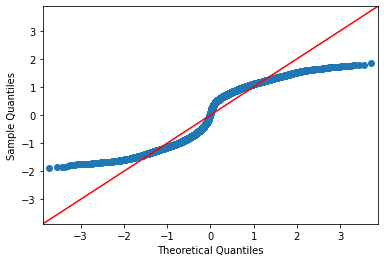

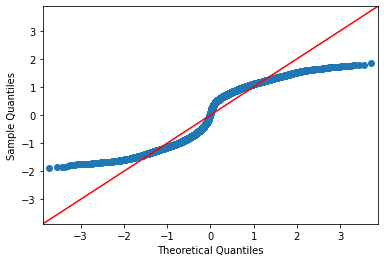

In [23]:
#QQ Plot

from statsmodels.api import qqplot
qqplot(data=mdl_readmis_initial.resid, fit=True, line="45")

Text(0, 0.5, 'Sqrt of abs val of standardized resids')

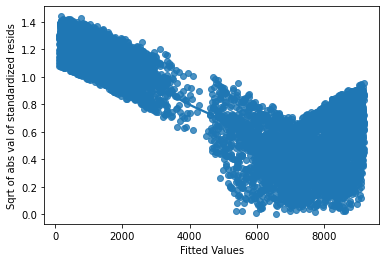

In [24]:
#Scale-location plot

#First step is to get normalized residuals from the model

model_norm_residuals_readmis = mdl_readmis_initial.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_readmis = np.sqrt(np.abs(model_norm_residuals_readmis))

sns.regplot(x=mdl_readmis_initial.fittedvalues, y=model_norm_residuals_abs_sqrt_readmis, ci=None, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt of abs val of standardized resids")

In [25]:
##Extreme explanatory values

roach["extreme_l"] = ((roach["length_cm"] <15) |
                      (roach["length_cm"] > 26))

fig = plt.figure()
sns.regplot(x="length_cm",
            y="mass_g",
           data=roach,
           ci=None)

sns.scatterplot(x="length_cm",
                y="mass_g",
               hue="extreme_l",
               data=roach)

##Leverage and influence: Leverage is a measure of how extreme the explanatory variable values are
##Influence: measures how much the model would change if you left the observation out of the dataset when modeling
##As a level arm helps produce torque, the influence of each observation is based on the size of the residuals and the leverage

#Get influence and summary frame

mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()
roach["leverage"] = summary_roach["hat_diag"]

print(roach.head())

##Returns array with leverage values that indicate how extreme the numbers are

##Cook's distance: most common measure of influence

roach["cooks_dist"] = summary_roach["cooks_d"]
print(roach.head())

##Most influential data points

print(roach.sort_values("cooks_dist", ascending=False))

##Removing most influential data point

roach_not_short = roach[ropach["length_cm"] ~=12.9]

sns.regplot(x="length_cm",
           y="mass_g",
           data=roach,
           ci=None,
           line_kws={"color": "green"})

sns.regplot(x="length_cm",
           y="mass_g",
           data=roach_not_short,
           ci=None,
           line_kws={"color": "red"})

SyntaxError: invalid syntax (1318018951.py, line 42)

In [26]:
#Turn categorical values into quantitative data
df['Marital_numeric'] = df['Marital']
dict_marital = {"Marital_numeric": {"Never Married": 0,"Separated": 1,"Widowed": 2,"Divorced": 3, "Married": 4}}
df.replace(dict_marital, inplace=True)

df['Gender_numeric'] = df['Gender']
dict_gender = {"Gender_numeric": {"Nonbinary": 0,"Male": 1,"Female": 2}}
df.replace(dict_gender, inplace=True)

df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['Initial_admin_numeric'] = df['Initial_admin']
dict_Initial_admin = {"Initial_admin_numeric": {"Emergency Admission": 0, "Elective Admission": 1,"Observation Admission": 2}}
df.replace(dict_Initial_admin, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Complication_risk_numeric'] = df['Complication_risk']
dict_complication = {"Complication_risk_numeric": {"Low": 0, "Medium": 1, "High": 2}}
df.replace(dict_complication, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

df['Services_numeric'] = df['Services']
dict_services = {"Services_numeric": {"Blood Work": 0, "Intravenous": 1, "CT Scan": 2, "MRI": 3}}
df.replace(dict_services, inplace=True)

#Check for new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  int64  
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   Marital                     10000 non-null  object 
 4   Gender                      10000 non-null  object 
 5   ReAdmis                     10000 non-null  object 
 6   VitD_levels                 10000 non-null  float64
 7   Doc_visits                  10000 non-null  int64  
 8   Full_meals_eaten            10000 non-null  int64  
 9   vitD_supp                   10000 non-null  int64  
 10  Soft_drink                  10000 non-null  object 
 11  Initial_admin               10000 non-null  object 
 12  HighBlood                   10000 non-null  object 
 13  Stroke                      1000

In [27]:
##Extracing leverage and influence

# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

NameError: name 'mdl_price_vs_dist' is not defined

In [28]:
##Logistic Regression with a binary response variable

##Readmission vs initial_days linear model

mdl_readmis_vs_initial_lm = ols("ReAdmis_numeric ~ Initial_days", data=df).fit()

print(mdl_readmis_vs_initial_lm.params)

intercept, slope = mdl_readmis_vs_initial_lm.params

Intercept      -0.170177
Initial_days    0.015588
dtype: float64


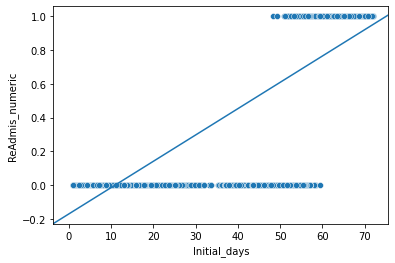

In [29]:
sns.scatterplot(x="Initial_days", y="ReAdmis_numeric", data=df)

plt.axline(xy1=(0, -0.170177), slope=slope)

plt.show()

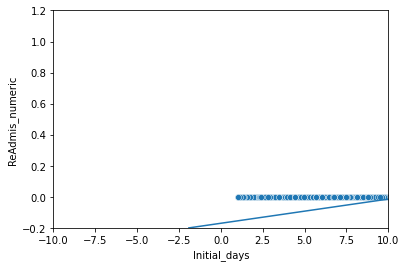

In [30]:
sns.scatterplot(x="Initial_days", y="ReAdmis_numeric", data=df)

plt.axline(xy1=(0, -0.170177), slope=slope)

plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)
plt.show()

##Solution to fixing these models is using a logistic regression model

What is logistic regression?

Another type of generalized linear model
Used when the response variable is logical
The responses follow logistic (S-shaped) curve.

To run logistic regression refer to the following.

This process fits a logistic regression model to the data.

In [31]:
from statsmodels.formula.api import logit

mdl_readmis_vs_initial_logit = logit ("ReAdmis_numeric ~ Initial_days", data=df).fit()
print(mdl_readmis_vs_initial_logit.params)

Optimization terminated successfully.
         Current function value: 0.048935
         Iterations 13
Intercept      -53.627240
Initial_days     0.987226
dtype: float64


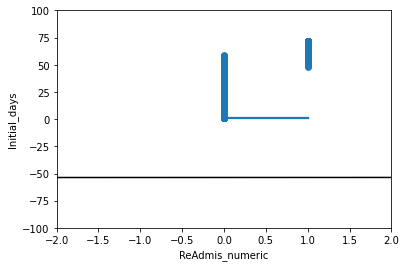

In [32]:
##Visualizing the logistic model

sns.regplot(x="ReAdmis_numeric", y="Initial_days", data=df, ci=None, logistic=True)

plt.axline(xy1=(0, -53.627240), slope=slope, color="black")

plt.xlim(-2, 2)
plt.ylim(-100, 100)
plt.show()

In [ ]:
## Comparing Models

# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
                y="has_churned",
                data=churn,
                ci=None,
                logistic=True,
                line_kws={"color": "blue"})

plt.show()

##Logistic Regression with logit()

# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset. This is a prediction.
mdl_churn_vs_relationship = logit ("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

In [ ]:
#Odds Ratio. Predicting the likelihood of something happening or not happening

sns.plotline(x="time_since_last_purchase",
            y="odds_ratio",
            data=prediction_data)

plt.axhline(y=1,
           linestyle="dotted")

plt.show()

In [ ]:
#Odds Ratio on log scale

sns.plotline(x="time_since_last_purchase",
            y="odds_ratio",
            data=prediction_data)

plt.axhline(y=1,
           linestyle="dotted")

plt.yscale("log")

plt.show()

In [ ]:
##Calculating log odds ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned=mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

#Creating a regression plot with a scatterplot overlaid

# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(y="has_churned", x="time_since_first_purchase", data=churn, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(y="has_churned", x="time_since_first_purchase", data=prediction_data, color="red")

plt.show()

# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

plt.show()

# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"]/(1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase", y="odds_ratio", data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

# Update the code for the line plot to plot log_odds_ratio vs time_since_first_purchase

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [ ]:
#Quantifying logistic regression fit
#confusion Matrix counting outcomes vs prediction, positives/negatives, false positives/negatives

#Example code to make a confusion matrix

actual_response = churn["has_churned"]

predicted_response = np.round(mdl_recency.predict())

outcomes = pd.DataFrame({"actual_response": actual_response,
                        "predicted_response": predicted_response})

print(outcomes.value_counts(sort=False))

#Visualizing confusion matrix

conf_matrix = mdl_recency.pred_table()

print(conf_matrix)

from statsmodels.graphics.mosaicplot
import mosaic

mosaic(conf_matrix)

#Calculating accuracy: the proportion of correct predictions 

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TN + TP) / (TN + TP + FN + FP)
print(acc)

#Sensitivity: proportion of true positives

sens = TP / (FN + TP)
print(sens)

#Specificity: proportion of true negatives

spec = TN / (TN + FP)
print(spec)

In [36]:
#Linear Regression with one explanatory variable at a time

from statsmodels.formula.api import ols

#fitting a linear regression with intercept
mdl_initial_vs_vitd = ols("Initial_days ~ VitD_levels", data=df).fit()

print('Initial vs VitD Levels:\n', mdl_initial_vs_vitd.params)

#fitting a linear regression without intercept
mdl_initial_vs_services = ols("ReAdmis_numeric ~ Services + 0", data=df).fit()

print('Initial vs Services:\n', mdl_initial_vs_services.params)

Initial vs VitD Levels:
 Intercept      35.308554
VitD_levels    -0.047497
dtype: float64
Initial vs Services:
 Services[Blood Work]     0.366572
Services[CT Scan]        0.398367
Services[Intravenous]    0.352396
Services[MRI]            0.389474
dtype: float64


In [37]:
#Both variables at the same time

#fit a linear regression with multiple variables, no intercept
mdl_readmis_vs_both = ols("Initial_days ~ VitD_levels + Services + 0", data=df).fit()

print(mdl_readmis_vs_both.params)

Services[Blood Work]     35.461939
Services[CT Scan]        35.855607
Services[Intravenous]    34.703627
Services[MRI]            36.317347
VitD_levels              -0.047317
dtype: float64


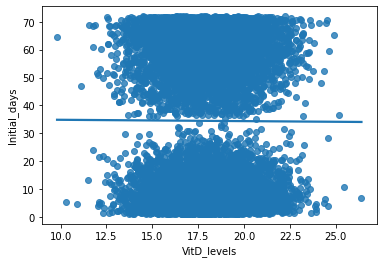

In [38]:
#Visualization: 1 numeric explanatory variable


import matplotlib.pyplot as plt
import seaborn as sns

#create scatterplot with linear trend line of initial_days vs VitD_levels
sns.regplot(x="VitD_levels",
            y="Initial_days",
           data=df,
           ci=None)

plt.show()

<AxesSubplot:xlabel='Services', ylabel='Initial_days'>

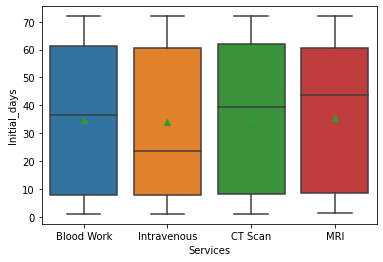

In [39]:
#Visualization: 1 categoricla explanatory variable

#create a boxplot of initial_days vs services
sns.boxplot(x="Services",
           y="Initial_days",
           data=df,
           showmeans=True)

Services[Blood Work]     35.461939
Services[CT Scan]        35.855607
Services[Intravenous]    34.703627
Services[MRI]            36.317347
VitD_levels              -0.047317
dtype: float64


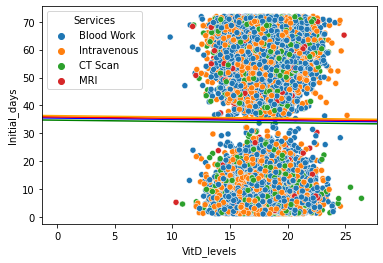

In [44]:
#Visualization: both explanatory variables

#extract model coefficients
coeffs = mdl_readmis_vs_both.params

#print model coefficients
print(coeffs)

#assign each of the coefficients
ic_bloodwork, ic_iv, ic_ctscan, ic_mri, sl = coeffs

sns.scatterplot(x="VitD_levels",
               y="Initial_days",
               hue="Services",
               data=df)

plt.axline(xy1=(0, ic_bloodwork), slope=sl, color="blue")
plt.axline(xy1=(0, ic_ctscan), slope=sl, color="green")
plt.axline(xy1=(0, ic_iv), slope=sl, color="red")
plt.axline(xy1=(0, ic_mri), slope=sl, color="orange")
plt.show()

In [63]:
#Predicting parallel slopes: the prediction workflow

import pandas as pd
import numpy as np

expl_data_length = pd.DataFrame(
    {"Initial_days": np.arange(5, 61, 5)})
print(expl_data_length)


Initial_days = np.arange(5, 61, 5)
servicetype = df["services"].unique()

p = product(Initial_days, servicetype)

expl_data_length = pd.DataFrame(p,
                            columns=['Initial_days',
                                    'servicetype'])

prediction_data_length = expl_data_length.assign(
    mass_g = mdl_m)

    Initial_days
0              5
1             10
2             15
3             20
4             25
5             30
6             35
7             40
8             45
9             50
10            55
11            60


KeyError: 'services'

In [66]:
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

KeyError: 'Services'

In [ ]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope  = coeffs

In [ ]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data)

plt.show()

In [ ]:
# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

In [ ]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data=auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x="openbid",
                y="price",
                data=auctions,
                )

# Show the plot
plt.show()

# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both =ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(y="price",
            x="openbid",
            hue="auction_type",
            data=auctions)

# Show the plot
plt.show()




In [1]:
#Two numeric explanatory variables

#Visualizing three numeric variables
#3D scatterplot
#or a 2d scatterplot using color for the 3rd variable

sns.scatterplot(x="length_cm",
                y="height_cm",
               data=fish,
               hue="mass_g")

#Modeling with two numeric explanatory variables, no interaction
mdl_mass_vs_both = ols("mass_g ~ length_cm + height_cm", data=fish).fit()

print(mdl_mass_vs_both.params)

#The prediction flow
from itertools import product
length_cm = np.arange(5, 61, 5)
height_cm = np.arange(2, 21, 2)

p = product(length_cm, height_cm)

explanatory_data = pd.DataFrame(p, columns = ["length_cm",
                                             "height_cm"])

prediction_data = explanatory_data.assign(
    mass_g = mdl_mass_vs_both.predict(explanatory_data))

print(prediction_data)

#plotting predictions

#plot with actual data points
sns.scatterplot(x="length_cm",
                y="height_cm",
                data=fish,
                hue="mass_g")

#plot with prediction data points
sns.scatterplot(x="length_cm",
                y="height_cm",
                data=prediction_data,
                hue="mass_g",
                legend=False,
                marker="s")

plt.show()

#including an interaction, gives one extra slope term for the effect of the interaction between the two explanatory variables

mdl_mass_vs_both_inter = ols("mass_g ~ length_cm * height_cm", data=fish).fit()

print(mdl_mass_vs_both_inter.params)

#prediction flow the same as before, only change is name of model
from itertools import product
length_cm = np.arange(5, 61, 5)
height_cm = np.arange(2, 21, 2)

p = product(length_cm, height_cm)

explanatory_data = pd.DataFrame(p, columns = ["length_cm",
                                             "height_cm"])

prediction_data = explanatory_data.assign(
    mass_g = mdl_mass_vs_both_inter.predict(explanatory_data))

#plotting code the same as before, but colors will be slightly different
sns.scatterplot(x="length_cm",
                y="height_cm",
                data=fish,
                hue="mass_g")

#plot with prediction data points
sns.scatterplot(x="length_cm",
                y="height_cm",
                data=prediction_data,
                hue="mass_g",
                legend=False,
                marker="s")

plt.show()

NameError: name 'sns' is not defined

In [ ]:
#Datacamp Chapter Review

Visualizing three numeric variables
There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

taiwan_real_estate is available.

# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=taiwan_real_estate,
                hue="price_twd_msq",
                legend=False,
                marker="s")

# Show the plot
plt.show()

# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ["n_convenience", "sqrt_dist_to_mrt_m"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data)
)

# See the result  
print(prediction_data)

# Create scatter plot of taiwan_real_estate
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=taiwan_real_estate,
                hue="price_twd_msq")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=prediction_data,
                hue="price_twd_msq",
                legend=False,
                marker="s")

# Show the plot
plt.show()

#changing the model to include an interaction
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

In [ ]:
#Faceting by group

# Prepare the grid using fish, for each species category, colored by mass_g
grid = sns.FacetGrid (data=fish,
                        col="species",
                         hue="mass_g",
                         col_wrap=2,
                         palette="plasma")

# Plot the scatterplots with length_cm on the x-axis and height_cm on the y-axis
grid.map(sns.scatterplot,
            "length_cm",
            "height_cm")

plt.show()

#Models with different levels of interaction

#No interactions
ols("mass_g ~ length_cm + height_cm + species + 0", data=fish).fit()

#Two-way interaction between pairs of variables
ols(
    "mass_g ~ length_cm + height_cm + species + length_cm:height_cm + 
    length_cm:species + height_cm:species + 0", data=fish).fit()
    
#New syntax for two-way interaction
ols(
    "mass_g ~ (length_cm + height_cm + species) **2 + 0", data=fish).fit()
    
#Three-way interaction between all three variables
    
ols(
    "mass_g ~ length_cm + height_cm + species + 
    length_cm:height_cm + length_cm:species + height_cm:species + length_cm:height_cm:species + 0", data=fish).fit()

#Can also be written as: (+ before 0 denotes to not include a global intercept in the output)

ols("mass_g ~ length_cm * height_cm * species + 0", data=fish).fit()
    
    
#Prediction flow with extra variable

mdl_mass_vs_all = ols(
    "mass_g ~ length_cm * height_cm * species + 0",
    data=fish).fit()

length_cm = np.arange(5, 61, 5)
height_cm = np.arange(2, 21, 2)
species = fish["species"].unique()
    
p = product(length_cm, height_cm, species)

explanatory_data = pd.DataFrame(p, columns = ["length_cm",
                                             "height_cm",
                                             "species"])

prediction_data = explanatory_data.assign(
    mass_g = mdl_mass_vs_all.predict(explanatory_data))

print(prediction_data)

How linear regression works.

Residuals will show how far off the model is from a perfect line. We want to make those line as small as possible

The simplest idea (which doesn't work)
- Take the sum of all the residuals
- Some residuals are negative

The next simplest idea (which does work)
- Take the square of each residual, and add up those squares
- this is called the sum of squares

Here we use the quadratic equation to find the minimum point of a function

y = x^2 - x + 10

x = np.arange(-4, 5, 0.1)
y = x ** 2 - x + 10

xy_data = pd.DataFrame({"x": x,
                        "y": y})
                        
sns.lineplot(x="x",
            y="y",
            data=xy_data)
            
Can then take the derivate and use calculus to find the minimum point.

Python can do this for us.

from scipy.optimize import minimize

def cal_quadratic(x):
    y = x ** 2 - x + 10
    return y

minimize(fun=calc_quadratic,
        x0=3)
        
A linear regresion algorithm
- Define a function to calculate the sum of squares metric.

def calc_sum_of_squares(coeffs):
    intercept, slope = coeffs

minimize(
    fun=calc_sum_of_squares,
    x0=0
)

-- Sum of squares is a measure of how far the predicted responses are from the actual responses, so a smaller number is better.



In [ ]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0, 0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

#The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). 
#All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its 
#magic to find where this function had its minimum value. 

In [5]:
#Multiple Logistic Regression

#logit()

from statsmodels.formula.api import logit

logit("response ~ explanatory", data=dataset).fit()

#or multiple variables with no interactions

logit("response ~ explanatory1 + explanatory2", data=dataset).fit()

#or multiple variables with interactions

logit("response ~ explanatory1 * explanatory2", data=dataset).fit()

#confusion matrix to produce the four possible outcomes

conf_matrix = mdl_logit.pred_table()

print(conf_matrix)

#prediction flow

from itertools import product

explanatory1 = some_values
explanatory2 = some_values

p = product(explanatory1, explanatory2)
explanatory_data = pd.DataFrame(p,
                                columns = ["explanatory1",
                                          "explanatory2"])

prediction_data = explanatory_data.assign(
    mass_g = mdl_logit.predict(explanatory_data))

#for visualisation create a column with prediction data and most likely outcome

prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

sns.scatterplot(...
               data=churn,
               hue="has_churned",
               ...)

sns.scatterplot(...
               data=prediction_data,
               hue="most_likely_outcome",
               ...)

SyntaxError: invalid syntax (69750859.py, line 43)

In [ ]:
#Running from beginning to end

# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit("has_churned ~ time_since_first_purchase * time_since_last_purchase", data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_both_inter.predict(explanatory_data)
)

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data)

# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
               y="time_since_last_purchase",
     alpha=0.2,
     data=prediction_data,
     hue="most_likely_outcome",
     legend=False)

# Show the plot
plt.show()

# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)



In [ ]:
#The logistic distribution

#Gaussian probability density function (PDF)

from scipy.stats import norm

x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame ({
    "x": x,
    "gauss_pdf": norm.pdf(x)}
)

sns.lineplot (x="x",
              y="gauss_pdf",
              data=gauss_dist)

#guassian inverse CDF

p = np.arange(0.001, 1, 0.001)

gauss_dist_inv = pd.DataFrame({
    "p": p,
    "gauss_inv_cdf": norm.ppf(p)}
)

sns.lineplot (x="p",
              y="gauss_inv_cdf",
              data=gauss_dist)

#Logistic PDF

from scipy.stats import logistic

x = np.arange(-4, 4.05, 0.05)

logistic_dist = pd.DataFrame ({
    "x": x,
    "log_pdf": logistic.pdf(x)}
)

sns.lineplot(x="x",
             y="log_pdf",
             data=logistic_dist)

#Logistic distribution CDF is also called the logistic function
#Logistic distribution inverse CDF is also called the logit function

In [ ]:
#Unit activity

# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x",
            y="log_cdf",
            data=logistic_dist)

# Show the plot
plt.show()

# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",
            y="logit",
            data=logistic_dist_inv)

# Show the plot
plt.show()

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll
  
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0, 0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

In [ ]:
# Fit a logistic regression model
from sklearn import linear_model
X = basetable[["age","gender_F","time_since_last_gift"]]
y = basetable[["target"]]
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

# Create a DataFrame new_data from current_data that has only the relevant predictors 
new_data = current_data[["age", "gender_F", "time_since_last_gift"]]

# Make a prediction for each observation in new_data and assign it to predictions
predictions = logreg.predict_proba(new_data)
print(predictions[0:5])

# Sort the predictions
predictions_sorted = predictions.sort_values(["probability"])

# Print the row of predictions_sorted that has the donor that is most likely to donate
print(predictions_sorted.tail(1))

In [ ]:
#Variable selection for logistic regression

# Make predictions
predictions = logreg.predict_proba(X)
predictions_target = predictions[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, predictions_target)
print(round(auc,2))
# Find the candidate variables
candidate_variables = list(basetable.columns.values)
candidate_variables.remove("target")

# Create appropriate DataFrames
X_1 = basetable[variables_1]
X_2 = basetable[variables_2]
y = basetable[["target"]]

# Create the logistic regression model
logreg = linear_model.LogisticRegression()

# Make predictions using the first set of variables and assign the AUC to auc_1
logreg.fit(X_1, y)
predictions_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(y, predictions_1)

# Make predictions using the second set of variables and assign the AUC to auc_2
logreg.fit(X_2, y)
predictions_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(y, predictions_2)

# Print auc_1 and auc_2
print(round(auc_1,2))
print(round(auc_2,2))

# Calculate the AUC of a model that uses "max_gift", "mean_gift" and "min_gift" as predictors
auc_current = auc(["max_gift", "mean_gift", "min_gift"], ["target"], basetable)
print(round(auc_current,4))

# Calculate which variable among "age" and "gender_F" should be added to the variables "max_gift", "mean_gift" and "min_gift"
next_variable = next_best(["max_gift", "mean_gift", "min_gift"], ["age", "gender_F"], ["target"], basetable)
print(next_variable)

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "age" as predictors
auc_current_age = auc(["max_gift", "mean_gift", "min_gift", "age"], ["target"], basetable)
print(round(auc_current_age,4))

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "gender_F" as predictors
auc_current_gender_F = auc(["max_gift", "mean_gift", "min_gift", "gender_F"], ["target"], basetable)
print(round(auc_current_gender_F,4))

# Initialize the current variables
current_variables = []

# The forward stepwise variable selection procedure
number_iterations = 5
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, ["target"], basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

#Calculating AUC of individual variables
import numpy as np

# Calculate the AUC of the model using min_gift only
auc_min_gift = auc(["min_gift"], ["target"], basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(["income_high"], ["target"], basetable)
print(round(auc_income_high,2))

# Calculate the correlation between min_gift and mean_gift
correlation = np.corrcoef(basetable["min_gift"], basetable["mean_gift"])[0,1]
print(round(correlation,2))





In [ ]:
#Evaluating a model by creating a train and test set

# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop("target", 1)
y = basetable["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train["target"])/len(train), 2))
print(round(sum(test["target"])/len(test), 2))

#calculating the auc of a model built on a train set and evaluated on a test set

# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop('target', 1)
y = basetable["target"]

# Carry out 70-30 partititioning with stratification, test size = 0.3 will train the set that contains 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

 # Apply the auc_train_test function
auc_train, auc_test = auc_train_test(["age", "gender_F"], ["target"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

#building AUC curves

# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

In [ ]:
#cumulative gains curve

# Import the matplotlib.pyplot module 
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(targets_test, predictions_test)
plt.show()

#observe cumulative gains curve of a random model that aligns with the baseline

# Import the modules
import random
import matplotlib.pyplot as plt
import scikitplot as skplt

# Generate random predictions
random_predictions = [random.uniform(0,1) for r in range(len(targets_test))]

# Adjust random predictions
random_predictions = [(r, 1 - r) for r in random_predictions]

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(targets_test, random_predictions)
plt.show()

#The lift curve

# Import the matplotlib.pyplot module 
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

# Plot the lift curve
skplt.metrics.plot_lift_curve(targets_test, predictions_test)
plt.show()

# Generate perfect predictions
perfect_predictions = [(1-target , target) for target in targets_test["target"]]

# Plot the lift curve
skplt.metrics.plot_lift_curve(targets_test, perfect_predictions)
plt.show()

#business case using lift curve

# Plot the lift graph
skplt.metrics.plot_lift_curve(targets_test, predictions_test)
plt.show()

# Read the lift at 40% (round it up to the upper tenth)
perc_selected = 0.4
lift = 1.5

# Information about the campaign
population_size, target_incidence, campaign_cost, campaign_reward = 100000, 0.01, 1, 100
    
# Profit if all donors are targeted
profit_all = profit(target_incidence, 1, population_size, campaign_cost, campaign_reward)
print(profit_all)

# Profit if top 40% of donors are targeted
profit_40 = profit(lift * target_incidence, 0.4, population_size, campaign_cost, campaign_reward)
print(profit_40)

#Business case using cumulative gains curve

# Plot the cumulative gains
skplt.metrics.plot_cumulative_gain(targets_test, predictions_test)
plt.show()

# Number of targets you want to reach
number_targets_toreach = 30000 / 50
perc_targets_toreach = number_targets_toreach / 1000
cumulative_gains = 0.4
number_donors_toreach = cumulative_gains * 10000
print(number_donors_toreach)